Читање на датасетот

Датасетот ни е небалансиран така што голем дел на примероците се негативни (бидејќи повеќето луѓе немаат дијабетес)

In [1]:
import pandas as pd

dataset = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')
dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [2]:
dataset["Diabetes_binary"].value_counts(normalize=True)

Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64

## Dataset split

Поделба на датасетот на две подмножества со ист размер на класи
- offline датасет кој се користи за тренирање на моделот
- online датасет кој се користи за евалуација на моделот во Spark

In [3]:
from sklearn.model_selection import train_test_split

offline, online = train_test_split(dataset, test_size=0.2, stratify=dataset["Diabetes_binary"])

In [4]:
offline["Diabetes_binary"].value_counts(normalize=True)

Diabetes_binary
0.0    0.860666
1.0    0.139334
Name: proportion, dtype: float64

In [5]:
online["Diabetes_binary"].value_counts(normalize=True)

Diabetes_binary
0.0    0.860671
1.0    0.139329
Name: proportion, dtype: float64

Зачувување на поделените датасетови

In [6]:
offline.to_csv("data/offline.csv", index=False)
online.to_csv("data/online.csv", index=False)

## Train
dataset is already cleaned

In [38]:
import pandas as pd

offline = pd.read_csv("data/offline.csv")

In [39]:
offline.shape

(202944, 22)

Exploratory data analysis

In [40]:
offline.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.00000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.139334,0.428355,0.423752,0.962591,28.388822,0.443408,0.040277,0.093740,0.756736,0.634185,...,0.951105,0.08461,2.510762,3.180513,4.239978,0.168396,0.440442,8.027820,5.052157,6.058528
std,0.346296,0.494842,0.494153,0.189763,6.628248,0.496788,0.196609,0.291468,0.429054,0.481659,...,0.215650,0.27830,1.067711,7.405895,8.713683,0.374219,0.496441,3.053068,0.983259,2.068307
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [41]:
X = offline.drop(columns=["Diabetes_binary"])
y = offline["Diabetes_binary"].astype(int)

Треба да ги скалираме следните колони бидејќи се карактеристики со (скоро)
нормална распределба, но не можеме да користиме стандардизација бидејќи има 
аутлајери, па затоа користиме `RobustScaler` кој скалира според првиот и третиот квартил
и е отпорен на аутлајери

In [42]:
cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]

In [43]:
X[cols].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,28.388822,2.510762,3.180513,4.239978,8.027820,5.052157,6.058528
std,6.628248,1.067711,7.405895,8.713683,3.053068,0.983259,2.068307
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


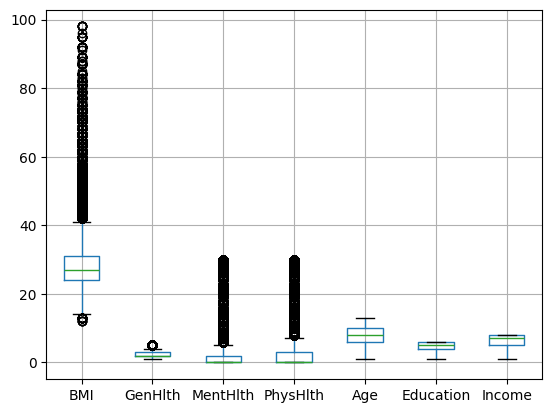

In [44]:
import matplotlib.pyplot as plt

X[cols].boxplot()
plt.show()

Поделба на множеството на тренирачко и валидациско

Ни треба валидациско за да имаме примероци кои се непознати на моделот
за да пресметаме ф1 метрика

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

In [47]:
# standardize the data
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
robust_scaler = RobustScaler() # outliers
# robust_scaler = StandardScaler() # outliers
robust_scaler.fit(X_train[cols])
X_train[cols] = robust_scaler.transform(X_train[cols])
X_val[cols] = robust_scaler.transform(X_val[cols])

# standard_scaler = StandardScaler() # normal
# standard_scaler.fit(X_train[["Age", "GenHlth"]])
# X_train[["Age", "GenHlth"]] = standard_scaler.transform(X_train[["Age", "GenHlth"]])
# X_val[["Age", "GenHlth"]] = standard_scaler.transform(X_val[["Age", "GenHlth"]])

# # minmax_scaler = MinMaxScaler() # normal
# minmax_scaler = StandardScaler() # normal
# minmax_scaler.fit(X_train[["Education", "Income"]])
# X_train[["Education", "Income"]] = minmax_scaler.transform(X_train[["Education", "Income"]])
# X_val[["Education", "Income"]] = minmax_scaler.transform(X_val[["Education", "Income"]])


In [48]:
import joblib

joblib.dump(robust_scaler, "robust_scaler.pkl")

['robust_scaler.pkl']

In [49]:
X_train[cols].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,162355.000000,162355.000000,162355.000000,162355.000000,162355.000000,162355.000000,162355.000000
mean,0.197745,0.510726,1.585812,1.413099,0.006350,0.025934,-0.312406
std,0.945670,1.066099,3.698977,2.906060,0.763513,0.491427,0.688401
min,-2.142857,-1.000000,0.000000,0.000000,-1.750000,-2.000000,-2.000000
25%,-0.428571,0.000000,0.000000,0.000000,-0.500000,-0.500000,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.571429,1.000000,1.000000,1.000000,0.500000,0.500000,0.333333
max,10.142857,3.000000,15.000000,10.000000,1.250000,0.500000,0.333333


Сите скалирани карактеристики имаат отприлика ист ранг на вредности, па така
нивната разлика во магнитуда не влијае на моделот и поради тоа што се помали 
вредности моделот побрзо конвергира 

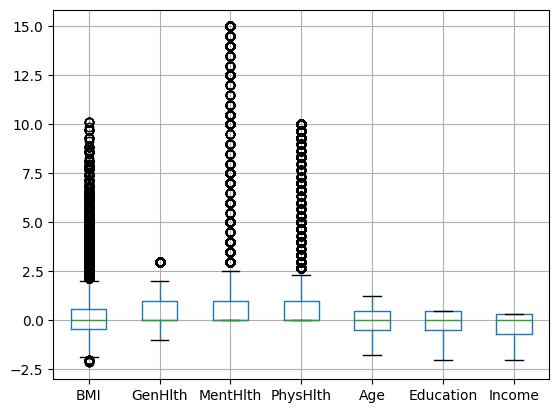

In [60]:
import seaborn as sns

X_train[cols].boxplot()
plt.show()

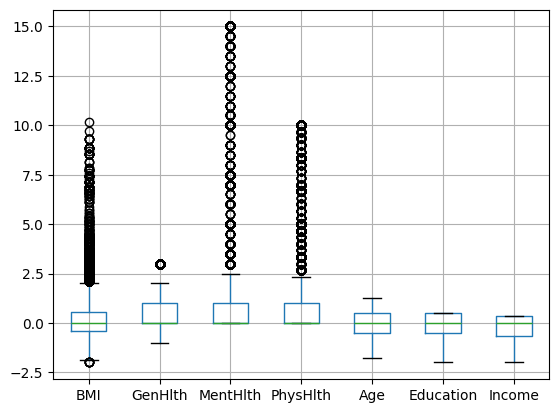

In [61]:
X_val[cols].boxplot()
plt.show()

In [62]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

(162355, 21) (40589, 21) (162355,) (40589,)
Diabetes_binary
0    0.860663
1    0.139337
Name: proportion, dtype: float64
Diabetes_binary
0    0.860677
1    0.139323
Name: proportion, dtype: float64


Ќе користиме три модели:
1. Логистичка регресија
2. Random Forest
3. Support Vector класификатор со линеарен вектор
(пробав и KNN класификатор но поради големината на датасетот беше спор)

Поради тоа што датасетот не е балансиран, користиме `class_weight='balanced'`
бидејќи нормално моделот претпоставува балансиран датасет, па им дава иста тежина
на сите класи.

Алгоритмот за оптимизација на хиперпараметри заклучува дека моделот кој ни
дава најдобри метрики на валидациското множество е
```
RandomForest: {'max_depth': 20, 'n_estimators': 100}, cv score: 0.834
For validation set, f1 score: 0.834
```

При барање на хиперпараметрите користиме Stratified KFold кој прави 5 поделби
на датасетот и пресметува просечна метрика која ни дава претстава колку
би била метриката при предвидување. Ние потоа повторно пресметуваме метрика
на валидациското множество.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import joblib # pickle

# we use cv because the dataset is not balanced
# we use `class_weight='balanced'` because the dataset is not balanced
models = {
    'LogisticRegression': LogisticRegression(max_iter=500, class_weight='balanced', n_jobs=2),
    'RandomForest': RandomForestClassifier(n_jobs=2, class_weight='balanced'),
    'LinearSVC': LinearSVC(class_weight='balanced', ),
}

param_grids = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 50]},
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [10, 20]},
    'LinearSVC': {'C': [0.001, 0.01, 0.1, 1, 5, 10, 50]}
}

best = {
    "model": None,
    "name": None,
    "f1": 0
}

# we use f1_weighted because the dataset is not balanced
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], scoring='f1_weighted', cv=5, n_jobs=2, verbose=3)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}, best score: {grid_search.best_score_}")

    # model validation
    y_preds = grid_search.best_estimator_.predict(X_val)
    f1 = f1_score(y_val, y_preds, average="weighted")

    print(f"For validation set, f1 score: {f1}")

    if best['f1'] < f1:
        best['model'] = grid_search.best_estimator_
        best['name'] = model_name
        best['f1'] = f1

print(f"Saving the best model {best['name']} with f1 score: {best['f1']}")
joblib.dump(best['model'], 'model.pkl')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV 2/5] END ...........................C=0.001;, score=0.773 total time=   1.3s
[CV 1/5] END ...........................C=0.001;, score=0.770 total time=   1.4s
[CV 3/5] END ...........................C=0.001;, score=0.773 total time=   1.6s
[CV 4/5] END ...........................C=0.001;, score=0.770 total time=   1.6s
[CV 5/5] END ...........................C=0.001;, score=0.770 total time=   1.1s
[CV 1/5] END ............................C=0.01;, score=0.771 total time=   1.7s
[CV 2/5] END ............................C=0.01;, score=0.773 total time=   1.5s
[CV 3/5] END ............................C=0.01;, score=0.773 total time=   1.4s
[CV 4/5] END ............................C=0.01;, score=0.771 total time=   1.6s
[CV 5/5] END ............................C=0.01;, score=0.770 total time=   1.7s
[CV 1/5] END .............................C=0.1;, score=0.771 total time=   1.8s
[CV 2/5] END .............................C=0.1;, score=0.773 total time=   2.1s
[CV 3/5] END ...............

['model.pkl']

In [64]:
from sklearn.metrics import classification_report

y_preds = best["model"].predict(X_val)
print(classification_report(y_val, y_preds))
print(f1_score(y_val, y_preds, average="weighted"))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     34934
           1       0.41      0.39      0.40      5655

    accuracy                           0.84     40589
   macro avg       0.65      0.65      0.65     40589
weighted avg       0.83      0.84      0.83     40589

0.8342786599400076


## Test
use model in spark program to predict streaming data

In [1]:
import joblib

model = joblib.load('model.pkl')
model

RandomForestClassifier(class_weight='balanced', max_depth=20, n_jobs=2)

In [2]:
import findspark
findspark.init()

Отвораме нова спарк сесија и правиме датафрејм во кој се сместуваат моменталните
податоци во протокот од кафка

In [23]:
from pyspark.sql import SparkSession

# open a spark session which consumes from the 'health_data' kafka topic
spark = (SparkSession.builder
         .appName('DiabetesPrediction')
         .config('spark.jars.packages', 'org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.4')
         .getOrCreate())

In [24]:
df = (spark.readStream.format('kafka')
      .option('kafka.bootstrap.servers', 'localhost:9092')
      .option('subscribe', 'health_data')
      .option('startingOffsets', 'latest')
      .load())


In [25]:
df.printSchema()

root
 |-- key: binary (nullable = true)
 |-- value: binary (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



Од колоните горе, потребна ни е само `value` во која е сместен примерокот
кодиран во json

In [26]:
import pyspark.sql.functions as F

cols = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
parsed_df = df.select(F.json_tuple(F.col('value').cast('string'), *cols).alias(*cols))
parsed_df.printSchema()

root
 |-- HighBP: string (nullable = true)
 |-- HighChol: string (nullable = true)
 |-- CholCheck: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- Smoker: string (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- HeartDiseaseorAttack: string (nullable = true)
 |-- PhysActivity: string (nullable = true)
 |-- Fruits: string (nullable = true)
 |-- Veggies: string (nullable = true)
 |-- HvyAlcoholConsump: string (nullable = true)
 |-- AnyHealthcare: string (nullable = true)
 |-- NoDocbcCost: string (nullable = true)
 |-- GenHlth: string (nullable = true)
 |-- MentHlth: string (nullable = true)
 |-- PhysHlth: string (nullable = true)
 |-- DiffWalk: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Income: string (nullable = true)



Ги претвораме податоците од стрингови во реални броеви

In [27]:
parsed_df = parsed_df.select([F.col(c).cast('float') for c in cols])
parsed_df.printSchema()

root
 |-- HighBP: float (nullable = true)
 |-- HighChol: float (nullable = true)
 |-- CholCheck: float (nullable = true)
 |-- BMI: float (nullable = true)
 |-- Smoker: float (nullable = true)
 |-- Stroke: float (nullable = true)
 |-- HeartDiseaseorAttack: float (nullable = true)
 |-- PhysActivity: float (nullable = true)
 |-- Fruits: float (nullable = true)
 |-- Veggies: float (nullable = true)
 |-- HvyAlcoholConsump: float (nullable = true)
 |-- AnyHealthcare: float (nullable = true)
 |-- NoDocbcCost: float (nullable = true)
 |-- GenHlth: float (nullable = true)
 |-- MentHlth: float (nullable = true)
 |-- PhysHlth: float (nullable = true)
 |-- DiffWalk: float (nullable = true)
 |-- Sex: float (nullable = true)
 |-- Age: float (nullable = true)
 |-- Education: float (nullable = true)
 |-- Income: float (nullable = true)



In [28]:
scale_cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]
scaler = joblib.load("robust_scaler.pkl")

Во `predict` го земаме спарк датафрејмот претворен во пандас датафрејм (sklearn
работи само со пандас датафрејмови), ги скалираме колоните во `scale_cols` и 
потоа предвидуваме за секој примерок во датафрејмот. Предвидената класа ја
додаваме во нова колона и го враќаме датафрејмот.

Тука се користи `groupBy` без параметар клуч за да се прати цел датафрејм како
аргумент на функцијата. 

In [29]:
from pyspark.sql.types import StructType, StructField, IntegerType
import pandas as pd

# inference
def predict(pdf):
    df = pd.DataFrame(pdf)
    orig = df[scale_cols]
    df[scale_cols] = scaler.transform(df[scale_cols])
    df["Diabetes_binary"] = model.predict(df)
    df[scale_cols] = orig
    return df

schema = StructType([StructField("Diabetes_binary", IntegerType())] + parsed_df.schema.fields)
predicted_df = parsed_df.groupBy().applyInPandas(predict, schema=schema)
predicted_df


DataFrame[Diabetes_binary: int, HighBP: float, HighChol: float, CholCheck: float, BMI: float, Smoker: float, Stroke: float, HeartDiseaseorAttack: float, PhysActivity: float, Fruits: float, Veggies: float, HvyAlcoholConsump: float, AnyHealthcare: float, NoDocbcCost: float, GenHlth: float, MentHlth: float, PhysHlth: float, DiffWalk: float, Sex: float, Age: float, Education: float, Income: float]

Се зема секоја редица и во колоната `value` се додава примерокот заедно со
предвидената класа кодиран во json.

In [30]:
from pyspark import Row
import json

def row_to_json(row):
    return json.dumps(row.asDict())
row_to_json_udf = F.udf(row_to_json)

result = predicted_df.withColumn("value", row_to_json_udf(F.struct(*predicted_df.columns)))

In [31]:
result_value = result.select("value")
result_value

DataFrame[value: string]

На кафка го праќаме датафрејмот само со колоната `value` на соодветниот топик

In [32]:
query = (result_value.writeStream
         .format('kafka')
         .option("kafka.bootstrap.servers", "localhost:9092")
         .option("topic", "health_data_predicted")
         .option("checkpointLocation", "checkpoints")
         .start())

25/01/13 01:16:17 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.


In [35]:
query.status

{'message': 'Processing new data',
 'isDataAvailable': True,
 'isTriggerActive': True}

In [36]:
spark.stop()

25/01/13 01:16:57 ERROR WriteToDataSourceV2Exec: Data source write support MicroBatchWrite[epoch: 194, writer: org.apache.spark.sql.kafka010.KafkaStreamingWrite@8d947da] is aborting.
25/01/13 01:16:57 ERROR WriteToDataSourceV2Exec: Data source write support MicroBatchWrite[epoch: 194, writer: org.apache.spark.sql.kafka010.KafkaStreamingWrite@8d947da] aborted.
25/01/13 01:16:57 WARN DiskBlockObjectWriter: Error deleting /tmp/blockmgr-e39b7c24-0266-4320-9995-3b9c1ebdb241/2e/temp_shuffle_64cce51f-4ac6-4590-8384-f9bbe938d2cb
25/01/13 01:16:58 ERROR TaskContextImpl: Error in TaskCompletionListener
org.apache.spark.SparkException: Block broadcast_128 does not exist
	at org.apache.spark.errors.SparkCoreErrors$.blockDoesNotExistError(SparkCoreErrors.scala:318)
	at org.apache.spark.storage.BlockInfoManager.blockInfo(BlockInfoManager.scala:269)
	at org.apache.spark.storage.BlockInfoManager.unlock(BlockInfoManager.scala:390)
	at org.apache.spark.storage.BlockManager.releaseLock(BlockManager.scala